![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
#!pip install -r requirements_v2.txt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install --force-reinstall --no-cache-dir numpy scipy scikit-learn pandas


In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

(541462, 3)

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

<Axes: >

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Preprocesamiento de texto con Count vectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
X_train_vec.shape

(362779, 141176)

In [ ]:
X_test_vec.shape

(178683, 141176)

#### 1a SGDRegressor:

Se utiliza este modelo lineal por la dificultad de procesamiento de los datos dada la gran cantidad de obsvervaciones y gran dimensionalidad resultante al aplicar count vectorizer.

In [ ]:
from sklearn.linear_model import SGDRegressor

modelo_sgd = SGDRegressor(random_state=42)
modelo_sgd.fit(X_train_vec, y_train)
y_pred_sgd = modelo_sgd.predict(X_test_vec)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Calcular el error cuadrático medio (MSE)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)

print(f"MSE regresión sgd: {mse_sgd:.4f}")
print(f"RMSE regresión sgd: {rmse_sgd:.4f}")
print(f"MAE regresión sgd: {mae_sgd:.4f}")

MSE regresión sgd: 0.0238
RMSE regresión sgd: 0.1542
MAE regresión sgd: 0.1067


In [ ]:
# Visualización de los primeros 5 valores del diccionario de palabras
# cada key es una palabra y cada valor es la posición en que dicha palabra se encuentra en la matrix

list(vectorizer.vocabulary_.items())[-5:]

#list(X_train_vec.vocabulary_.items())[0:5]

[('hanjob', 58305),
 ('2920', 2926),
 ('passcode', 93979),
 ('exclave', 46971),
 ('gergiev', 54175)]

In [ ]:
len(vectorizer.vocabulary_)


141176

In [ ]:
# Visualización de 50 términos en el diccionario de palabras
print(vectorizer.get_feature_names_out()[-150:-100])

['𝗕𝗲' '𝗙𝗮𝘁𝗵𝗲𝗿' '𝗜𝗳' '𝗦𝗼' '𝗧𝗿𝘂𝗹𝘆' '𝗮𝗻𝗱' '𝗮𝗻𝗻𝗼𝘂𝗻𝗰𝗲' '𝗮𝘀' '𝗯𝗲' '𝗯𝗶𝗹𝗹𝗶𝗼𝗻' '𝗯𝘆'
 '𝗰𝗮𝗿𝗲𝗳𝘂𝗹' '𝗱𝗼' '𝗱𝗼𝗹𝗹𝗮𝗿𝘀' '𝗳𝗿𝗼𝗺' '𝗳𝗿𝗼𝗻𝘁' '𝗳𝘂𝗹𝗹' '𝗴𝗞𝗭𝗘𝗳𝗿𝗪𝟱𝗺𝟳𝗤' '𝗴𝗶𝘃𝗲'
 '𝗵𝗮𝘃𝗲' '𝗵𝗲𝗮𝘃𝗲𝗻' '𝗵𝗼𝗻𝗼𝗿𝗲𝗱' '𝗵𝘁𝘁𝗽𝘀' '𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀' '𝗶𝗻' '𝗶𝘁' '𝗻𝗲𝗲𝗱𝘆' '𝗻𝗼'
 '𝗻𝗼𝘁' '𝗼𝗳' '𝗼𝗻' '𝗼𝘁𝗵𝗲𝗿𝘀' '𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲' '𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱' '𝗿𝗲𝘄𝗮𝗿𝗱' '𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀'
 '𝘀𝗲𝗲𝗻' '𝘀𝘁𝗿𝗲𝗲𝘁𝘀' '𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀' '𝘁𝗲𝗹𝗹' '𝘁𝗵𝗲' '𝘁𝗵𝗲𝗶𝗿' '𝘁𝗵𝗲𝗺' '𝘁𝗵𝗲𝘆' '𝘁𝗼'
 '𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀' '𝘄𝗵𝗲𝗻' '𝘄𝗶𝗹𝗹' '𝘄𝗶𝘁𝗵' '𝘆𝗼𝘂']


In [ ]:
# Preprocesamiento de texto con Count vectorizer
vectorizer_max = CountVectorizer(max_features=50000)
X_train_vec_max = vectorizer_max.fit_transform(X_train)
X_test_vec_max = vectorizer_max.transform(X_test)


### 1b Modelo basado en árboles: GradientBoostingRegressor

Probando con un algoritmo más eficiente con data set más grandes

In [ ]:
# generación de una muesta de los datos para entrenar un modelo de árboles

X_sample, _, y_sample, _ = train_test_split(X_train_vec_max, y_train, train_size=15000, random_state=42)



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor(max_leaf_nodes=31)


# Entrenamos el modelo con el muestreo

model_gbr.fit(X_sample, y_sample)

#predicción con X test

y_pred_gbr = model_gbr.predict(X_test_vec_max)

In [ ]:
#Calcular el error cuadrático medio (MSE)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print(f"MSE GradientBoostingRegressor: {mse_gbr:.4f}")
print(f"RMSE GradientBoostingRegressor: {rmse_gbr:.4f}")
print(f"MAE GradientBoostingRegressor: {mae_gbr:.4f}")

MSE GradientBoostingRegressor: 0.0275
RMSE GradientBoostingRegressor: 0.1657
MAE GradientBoostingRegressor: 0.1215


### 1c GradientBoostingRegressor con TruncatedSVD

In [ ]:
# Paso 1: Vectorización
vectorizer_count = CountVectorizer(ngram_range=(1,1))
X_train_vec_svd = vectorizer_count.fit_transform(X_train)
X_test_vec_svd = vectorizer_count.transform(X_test)


In [ ]:
from sklearn.decomposition import TruncatedSVD

# Paso 2: Reducción de dimensionalidad
svd = TruncatedSVD(n_components=100, random_state=42)
X_train_svd = svd.fit_transform(X_train_vec_svd)
X_test_svd = svd.transform(X_test_vec_svd)


In [ ]:
# Paso 3: Modelo
from sklearn.ensemble import GradientBoostingRegressor

modelo_gbr_svd = GradientBoostingRegressor(random_state=42)
modelo_gbr_svd.fit(X_train_svd, y_train)
y_pred_gbr_svd = modelo_gbr_svd.predict(X_test_svd)

# Paso 4: Evaluación
mse_gbr_svd = mean_squared_error(y_test, y_pred_gbr_svd)
rmse_gbr_svd = np.sqrt(mse_gbr_svd)
mae_gbr_svd = mean_absolute_error(y_test, y_pred_gbr_svd)

print(f"MSE GBR con Count + SVD: {mse_gbr_svd:.4f}")
print(f"RMSE GBR con Count + SVD: {rmse_gbr_svd:.4f}")
print(f"MAE GBR con Count + SVD: {mae_gbr_svd:.4f}")

MSE GBR con Count + SVD: 0.0373
RMSE GBR con Count + SVD: 0.1931
MAE GBR con Count + SVD: 0.1390


### Conclusión punto 1:

La variable que intentamos predecir esta muy desbalanceada y la mayor parte de las observaciones se acerca al cero lo que indica que en el contexto de los datos indica una toxicidad baja.

Para correr el modelo de regresión intentamos 2 opciones:

**1a)** Por limitación de ram tanto en google collab cómo en nuestros equipos locales corrimos primero un modelo de regresión lineal y calculamos el Error cuadrático medio (MSE), Raíz del error cuadrático medio (RMSE) y Error absoluto medio (MAE):

MSE regresión sgd: 0.0238  
RMSE regresión sgd: 0.1542  
MAE regresión sgd: 0.1067  

**1b)** También corrimos un modelo basado en árboles limitando los datos de entrenamientos a una muestra de Xtrain y limitando el número de features en count vectorizer  


MSE GradientBoostingRegressor: 0.0275  
RMSE GradientBoostingRegressor: 0.1657  
MAE GradientBoostingRegressor: 0.1215  

**1c)** Realizamos un tercer intento utilizando SVD para reducir la dimensionalidad pero los resultados no presentan una majoera:  

MSE GBR con Count + SVD: 0.0373  
RMSE GBR con Count + SVD: 0.1931  
MAE GBR con Count + SVD: 0.1390  

EL mejor modelo es el de regresión líneal, seguido por  GBR y por ultimo el GBR con count +SVD. Los resultados indican que el modelo tiene oportunidad de mejora ya que considerando el mae que es la métrica que se encuentra en la misma unidad que la variable respuesta vemos que el error promedio es casi igual el promedio de las toxicidad (0.1023).

| Rank | Modelo       |   MSE  |  RMSE  |   MAE  |
|------|--------------|--------|--------|--------|
| 1    | Regresión sgd| 0.0238 | 0.1542 | 0.1067 |
| 2    | GradientBoostingRegressor| 0.0275 | 0.1657 | 0.1215 |
| 3    | GBR con Count + SVD| 0.0373 | 0.1931  | 0.1390 |


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

#### 2a Sin calibrar hiperparámetros:

In [ ]:
# Preprocesamiento de texto con Count vectorizer y trigramas

vectorizer_trigrama = CountVectorizer(ngram_range=(3, 3))

X_train_vec_trigrama = vectorizer_trigrama.fit_transform(X_train)
X_test_vec_trigrama = vectorizer_trigrama.transform(X_test)


In [ ]:
# Usando mismo modelo con trigramas
from sklearn.linear_model import SGDRegressor

modelo_sgd_tri = SGDRegressor(random_state=42)
modelo_sgd_tri.fit(X_train_vec_trigrama, y_train)
y_pred_sgd_tri = modelo_sgd_tri.predict(X_test_vec_trigrama)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Calcular el error cuadrático medio (MSE)
mse_sgd_tri = mean_squared_error(y_test, y_pred_sgd_tri)
rmse_sgd_tri = np.sqrt(mse_sgd_tri)
mae_sgd_tri = mean_absolute_error(y_test, y_pred_sgd_tri)

print(f"MSE regresión con trigrama: {mse_sgd_tri:.4f}")
print(f"RMSE regresión con trigrama: {rmse_sgd_tri:.4f}")
print(f"MAE regresión con trigrama: {mae_sgd_tri:.4f}")

MSE regresión con trigrama: 0.0392
RMSE regresión con trigrama: 0.1979
MAE regresión con trigrama: 0.1381


#### 2b Con calibración de hiperparámetros:

In [ ]:
#from sklearn.model_http://localhost:8888/notebooks/Documents/MLPNL/TallerToken/S4TC1_TokenizacionAbril23.ipynb?#2b-Con-calibraci%C3%B3n-de-hiperpar%C3%A1metros:selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000],
    'tol': [1e-3, 1e-4]
}

modelo_sgd_tri_c = SGDRegressor(random_state=42)
grid = GridSearchCV(modelo_sgd_tri_c, param_grid, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train_vec_trigrama, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)

Mejores hiperparámetros encontrados:
{'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.0001}


In [ ]:
# El mejor modelo entrenado
mejor_modelo = grid.best_estimator_

# Predicción
y_pred_sgd_tri_mejor = mejor_modelo.predict(X_test_vec_trigrama)

# Métricas
mse_sgd_tri_mejor = mean_squared_error(y_test, y_pred_sgd_tri_mejor)
rmse_sgd_tri_mejor = np.sqrt(mse_sgd_tri_mejor)
mae_sgd_tri_mejor = mean_absolute_error(y_test, y_pred_sgd_tri_mejor)

print("Mejores hiperparámetros encontrados:", grid.best_params_)
print(f"MSE regresión con trigrama y calibración: {mse_sgd_tri_mejor:.4f}")
print(f"RMSE regresión con trigrama y calibración: {rmse_sgd_tri_mejor:.4f}")
print(f"MAE regresión con trigrama y calibración: {mae_sgd_tri_mejor:.4f}")


Mejores hiperparámetros encontrados: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.0001}
MSE regresión con trigrama y calibración: 0.0380
RMSE regresión con trigrama y calibración: 0.1950
MAE regresión con trigrama y calibración: 0.1420


### Conclusión punto 2:

Para este punto decidimos seguir usando la regresión linea ya que presentó mejores resultados que el modelo basado en árboles.

**2a)** Al utilizar trigramas en CountVectorizer (sin calibración)  los resultados empeoran y el error aumenta de la siguiente manera:  

MSE: El error aumenta, de 0.0238 a 0.0392   
RMSE: El error aumenta, de 0.1542 a 0.1979  
MAE: El error aumenta, de 0.1067 a 0.1381  

| Métrica | SinCalibración | ConCalibración | Sube/Baja ||
|------|--------------|-|--------|--------|
| MSE | 0.0238 | 0.0392 | Sube |  
| RMSE | 0.1542 | 0.1979 | Sube |  
| MAE | 0.1067 | 0.1381  | Sube |  

**2b)** Al utilizar trigramas en CountVectorizer (con calibración) los mejores hiperparámetros encontrados fueron:  

'alpha': 0.0001,   
'max_iter': 1000,  
'penalty': 'elasticnet',  
'tol': 0.0001  

Sin embargo los resultados son muy similares a los obtenidos en el punto 2a:

MSE regresión con trigrama y calibración: 0.0380  
RMSE regresión con trigrama y calibración: 0.1950  
MAE regresión con trigrama y calibración: 0.1420


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### Conclusión punto 3:
La función de **CountVectorizer** es dividir un texto en palabras (tokens) y convertirlo en una matriz donde cada fila representa un documento (texto) y cada columna una palabra del vocabulario obtenido de todo el corpus.
El número en cada posición de la matriz indica cuántas veces aparece esa palabra en el texto correspondiente.

Por ejemplo, en el punto 1 podemos ver que el vocabulario completo contiene 141,176 palabras/tokens (len(vectorizer.vocabulary_)), lo cual equivale al número de columnas en la matriz (X_train_vec.shape[1]).

Una desventaja de este enfoque es que genera una matriz de muy alta dimensionalidad, lo que puede afectar negativamente la eficiencia y el rendimiento de los modelos de machine learning, especialmente cuando hay muchas palabras poco relevantes o redundantes.

Por otro lado, **TfidfVectorizer** ofrece una mejora importante al considerar no sólo cuántas veces aparece una palabra en un texto, sino también cuántos documentos del corpus contienen esa palabra.
El objetivo es reducir el peso de las palabras muy frecuentes (como "la", "que", "en"), ya que suelen aportar poca información discriminativa.

Esto se logra mediante el cálculo del TF-IDF (Term Frequency – Inverse Document Frequency):

TF (frecuencia del término): cuántas veces aparece una palabra en el documento.

IDF (frecuencia inversa de documento): mide en cuántos documentos aparece esa palabra. Cuanto más frecuente, menor su peso.

**Ejemplo:**

Supongamos un texto donde:

La palabra "en" aparece 5 veces en el texto, pero 100 veces en todo el corpus.

La palabra "imaginación" aparece 2 veces en el texto y solo 5 veces en el corpus.

Con CountVectorizer:

"en" → 5

"imaginación" → 2

Con TfidfVectorizer (simplificando el cálculo):

"en" → 5/100 = 0.05

"imaginación" → 2/5 = 0.4

Esto muestra que "imaginación" tendrá más peso porque es menos común en el corpus y, por lo tanto, más informativa.






## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

#### 4a Tfid sin Trigramas

In [ ]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocesamiento de texto con TF-IDF sin trigramas (solo unigramas)
vectorizer_tfidf_uni = TfidfVectorizer(ngram_range=(1, 1))

X_train_vec_tfidf_uni = vectorizer_tfidf_uni.fit_transform(X_train)
X_test_vec_tfidf_uni = vectorizer_tfidf_uni.transform(X_test)

# Usando el mismo modelo con TF-IDF y unigramas
from sklearn.linear_model import SGDRegressor

modelo_sgd_tfidf_uni = SGDRegressor(random_state=42)
modelo_sgd_tfidf_uni.fit(X_train_vec_tfidf_uni, y_train)
y_pred_sgd_tfidf_uni = modelo_sgd_tfidf_uni.predict(X_test_vec_tfidf_uni)

# Evaluación del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse_sgd_tfidf_uni = mean_squared_error(y_test, y_pred_sgd_tfidf_uni)
rmse_sgd_tfidf_uni = np.sqrt(mse_sgd_tfidf_uni)
mae_sgd_tfidf_uni = mean_absolute_error(y_test, y_pred_sgd_tfidf_uni)

print(f"MSE regresión con TF-IDF y unigramas: {mse_sgd_tfidf_uni:.4f}")
print(f"RMSE regresión con TF-IDF y unigramas: {rmse_sgd_tfidf_uni:.4f}")
print(f"MAE regresión con TF-IDF y unigramas: {mae_sgd_tfidf_uni:.4f}")


MSE regresión con TF-IDF y unigramas: 0.0316
RMSE regresión con TF-IDF y unigramas: 0.1779
MAE regresión con TF-IDF y unigramas: 0.1266


#### 4b Tfid con Trigramas

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocesamiento de texto con TF-IDF y trigramas
vectorizer_tfidf_trigrama = TfidfVectorizer(ngram_range=(3, 3))

X_train_vec_tfidf_tri = vectorizer_tfidf_trigrama.fit_transform(X_train)
X_test_vec_tfidf_tri = vectorizer_tfidf_trigrama.transform(X_test)

# Usando el mismo modelo con trigramas TF-IDF
from sklearn.linear_model import SGDRegressor

modelo_sgd_tfidf_tri = SGDRegressor(random_state=42)
modelo_sgd_tfidf_tri.fit(X_train_vec_tfidf_tri, y_train)
y_pred_sgd_tfidf_tri = modelo_sgd_tfidf_tri.predict(X_test_vec_tfidf_tri)

# Evaluación del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse_sgd_tfidf_tri = mean_squared_error(y_test, y_pred_sgd_tfidf_tri)
rmse_sgd_tfidf_tri = np.sqrt(mse_sgd_tfidf_tri)
mae_sgd_tfidf_tri = mean_absolute_error(y_test, y_pred_sgd_tfidf_tri)

print(f"MSE regresión con TF-IDF y trigrama: {mse_sgd_tfidf_tri:.4f}")
print(f"RMSE regresión con TF-IDF y trigrama: {rmse_sgd_tfidf_tri:.4f}")
print(f"MAE regresión con TF-IDF y trigrama: {mae_sgd_tfidf_tri:.4f}")


MSE regresión con TF-IDF y trigrama: 0.0389
RMSE regresión con TF-IDF y trigrama: 0.1973
MAE regresión con TF-IDF y trigrama: 0.1446


#### Conclusión punto 4:

Los resultados obtenidos en este punto no presentan una mejora respecto al uso de CountVectorizer sin trigrama, que sigue siendo la mejor opción:

MSE regresión con TF-IDF y unigramas: 0.0316  
RMSE regresión con TF-IDF y unigramas: 0.1779  
MAE regresión con TF-IDF y unigramas: 0.1266  

MSE regresión con TF-IDF y trigrama: 0.0389  
RMSE regresión con TF-IDF y trigrama: 0.1973  
MAE regresión con TF-IDF y trigrama: 0.1446  

| Métrica | TF-IDF y unigramas | TF-IDF y trigrama | ||
|------|--------------|-|--------|-|
| MSE | 0.0316 | 0.0389 | |  
| RMSE | 0.1779 | 0.1973 | |  
| MAE | 0.1266 | 0.1446  |  |  

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [ ]:
# A continuación se comparan los mejores resultados de cada punto:

rmse_resultados = {
    "1a - RegLineal + CV": rmse_sgd,
    "2b - RegLineal Calibrada + CV + trigramas": rmse_sgd_tri_mejor,
    "4a - RegLineal + TF-IDF (unigramas)": rmse_sgd_tfidf_uni,
}

# Convertir a DataFrame
resultados_rmse = pd.DataFrame(list(rmse_resultados.items()), columns=["Modelo", "RMSE"])

# Mostrar la tabla ordenada por RMSE
resultados_rmse.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

,Modelo,RMSE
0,1a - RegLineal + CV,0.154181
1,4a - RegLineal + TF-IDF (unigramas),0.177900
2,2b - RegLineal Calibrada + CV + trigramas,0.195033


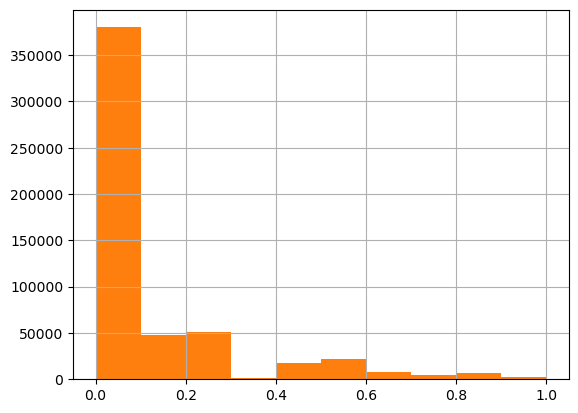

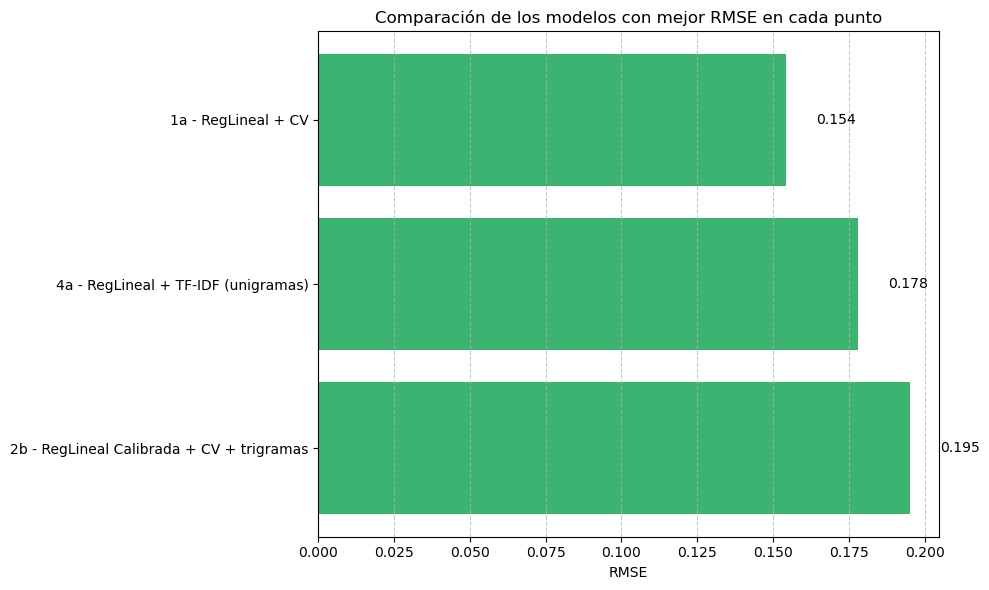

In [ ]:
### Punto 5.1 - Comparación y análisis de resultados

import matplotlib.pyplot as plt
resultados_rmse_sorted = resultados_rmse.sort_values(by="RMSE", ascending=True)

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(resultados_rmse_sorted["Modelo"], resultados_rmse_sorted["RMSE"], color="mediumseagreen")
plt.xlabel("RMSE")
plt.title("Comparación de los modelos con mejor RMSE en cada punto")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas con los valores de RMSE a la derecha de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f"{width:.3f}", va='center')

plt.tight_layout()
plt.show()

### Conclusión punto 5

En este trabajo se evaluaron diferentes enfoques para poder predecir la probabilidad de toxicidad en los comentarios. En el punto 1 se intentó correr modelos basados en árboles con algunos ajustes cómo el uso de una muestra de los datos o el uso de SVD para reducir la dimensionalidad ya que sin tomar estas medidas era imposible correr el modelo por limitaciones de memoria ram de nuestros equipos. Sin embargo como el modelo de regresión lineal fue el que dió mejor resultado continuamos utilizando este modelo para correr los siguientes puntos. Se compararon los resultados usando como métrica principal el Error Cuadrático Medio (RMSE).

A continuación, se resumen los resultados obtenidos en cada punto:

**Punto 1: CountVectorizer**  
En este punto se prueban distintos modelos y técnicas:

RMSE regresión sgd: 0.1542  
RMSE GradientBoostingRegressor (sample y max features): 0.1657  
RMSE GBR con Count + SVD: 0.1931  


**Punto 2: CountVectorizer + Trigramas**
A partir de qui seguimos co el modelo de regresión liean y se prueba el modelo sin calibrar y con calibración:

RMSE regresión con trigrama: 0.1979  
RMSE regresión con trigrama y calibración: 0.1950  

**Punto 3: explicación TF-IDF**

Aqui se explican las ventajas potenciales del uso de TF-IDF al reducir el peso de las palabras muy frecuentes en todo el corpus del texto.

**Punto 4: Implementación TF-IDF**
En este punto seguimos probando el mismo modelo pero ahora utilizando TF-IDFtanto con trigramas cómo sin trigramas:

RMSE regresión con TF-IDF y unigramas: 0.1779  
RMSE regresión con TF-IDF y trigrama: 0.1973  

Los tres mejores resultados son los siguientes:

| Modelo  | RMSE | | ||
|------|--------------|-|-|-|
|CountVectorizer regresión sgd | 0.1542 |  | |  
| TF-IDF y unigramas | 0.1779 | | |  
| CountVectorizer + Trigramas Calib | 0.1950 |  |  |  

**Resumen general:**

A pesar de probar distintas técnicas y opciones el modelo el primer punto fue el que arroja un mejor RMSE y si tomamos el Mean Absolut error para poder interpretar la magnitud del error vemos que el modelo tiene un error promedio absoluto de  0.1067, muy similar al promedio de las
toxicidad:0.1023. Esto indica que hay oportunidad de mejora y se deberian seguir probando técnicas más avanzadas para lograr mejoras significativas.